In [1]:
from scipy.optimize import curve_fit
import random
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 

T=30000 
l=1000 
dt=0.001
def f(l):
    return l[0]
#排序用的function 比較狀態list的第一個數 表示用位置來排序

    


def normal(avg,var,c): #從Gaussian亂數抽樣 (抽出來一定大於零) 
   
    a=np.ndarray.tolist(np.random.normal(avg,var,3000)) #a是一個有normal分布的list
    
    a=list(filter(lambda x:x>c,a)) #濾掉小於等於c的
    
    s=random.sample(a,1) #從a裡面抽一個出來 會是大小事1的list
    return s[0] #取出亂數


def ini(V_max,avg_d,avg_t,rho): #初始化道路的程式 
    S=[] #儲存初始state  [0]位置  [1]速度 [2]安全距離 [3]延遲時間
    
    n=int(rho*l) #車子數量由密度 道路長 所決定 初始的位置
    
    rad_x=random.sample(range(l),n) #不重複的n個數的list
    
    
    for i in range(n):
        S.append([rad_x[i],random.uniform(0,V_max),normal(avg_d,0.3*avg_d,0),normal(avg_t,0.1*avg_t,0)])
       

    S.sort(key=f)
    for i in  range(len(S)):
        if i>0 and S[i][0]<S[i-1][0]:
            print("位置出錯ㄌ")
    
    return S
    
    

def avg(x): #用來算list平均用的
    c=0
    for i in x:
        
        c+=i
            
    return c/len(x)


def rule(V_max,dx,car): #速度上限   與前車距離    Car 車子的狀態vector
    V_op=(V_max/2)*(np.tanh(dx-car[2])+np.tanh(car[2])) #由駕駛的delay time 安全距離 與前車距離 決定適當的速度
    car[1]+=(1/car[3])*(V_op-car[1])*dt
    if car[1]<0:
        car[1]=0
   
    
    
    
print("done")




                       

done


In [2]:
avgV=[] #個個時刻的平均速度

P=[] #所有時間所有狀態

t=[] #時間(長度和P一樣)
def traffic(V_max,avg_d,avg_t,rho):
    #n是車子數量 V_max速度上限 d 安全距離
    S=ini(V_max,avg_d,avg_t,rho)
    V=[] #計算平均速度用的
    
    for j in range(T):
        
        V1=[]
        #每個時段內發生的事
       
        for i in range(len(S)):
            x=len(S)-1
            t.append(j) 
            P.append(S[x-i][0])
           
            
        #每台車的狀況
            if i>0 :
                dx=S[x-i+1][0]-S[x-i][0] #前後車距
                rule(V_max,dx,S[x-i])
                    
                
                if S[x-i][1]<0 or dx<=0: #debug用的
                            
                    print(S[x-i][0],S[x-i][1],j,i)
                    break
                
            if i==0 : #最前面那台車的情形 要算和第一台車的距離
                
                dx=S[0][0]-(S[x-i][0]-l)
                rule(V_max,dx,S[x-i])
                 
            
        
        for k in range(len(S)):
            S[k][0]+=S[k][1]*dt  #更新車子的位置
                              
            V1.append(S[k][1])  #j時刻所有車的速度都丟進來
            
            
            if S[k][0]>l: 
                S[k][0]-=l
        S.sort(key=f) #等大家更新好位置後更新順序
               
         
        
        avgV.append(avg(V1)) #j時刻的平均速度
    



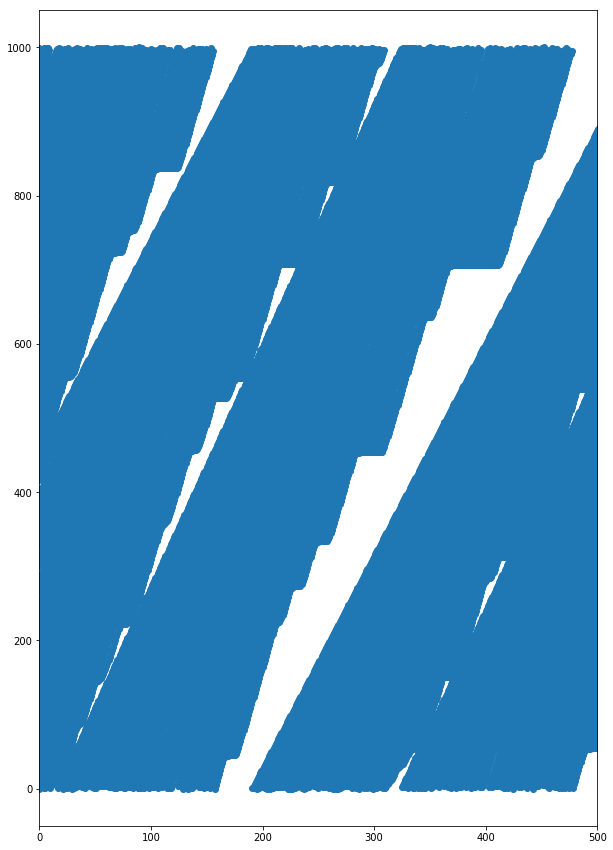

In [6]:
plt.figure(figsize=(10,15))
plt.xlim(0,500)
#plt.ylim(990,1000)
plt.scatter(t,P) #X 時間    Y 位置

In [ ]:
avg Safe distince is 5

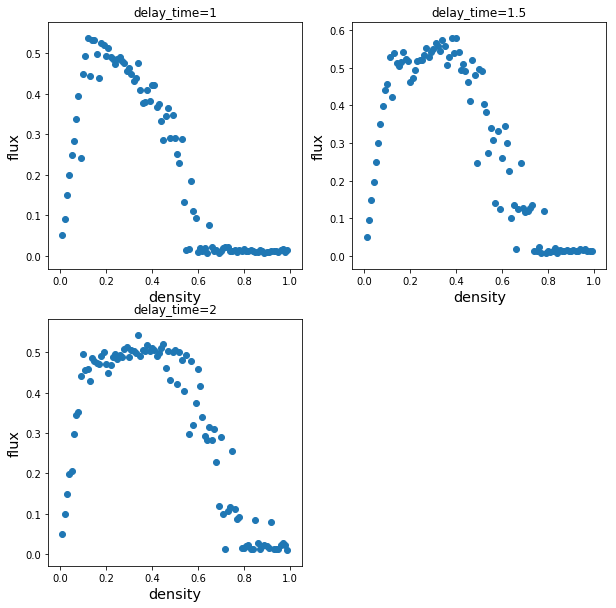

In [25]:
plt.figure(figsize=(10,10))
plt.subplot(221)
plt.title("delay_time=1")
plt.xlabel("density",fontsize='x-large')
plt.ylabel("flux",fontsize='x-large')
plt.scatter(rho,q1)
plt.subplot(222)
plt.title("delay_time=1.5")
plt.xlabel("density",fontsize='x-large')
plt.ylabel("flux",fontsize='x-large')
plt.scatter(rho,q2)
plt.subplot(223)
plt.title("delay_time=2")
plt.xlabel("density",fontsize='x-large')
plt.ylabel("flux",fontsize='x-large')
plt.scatter(rho,q3)

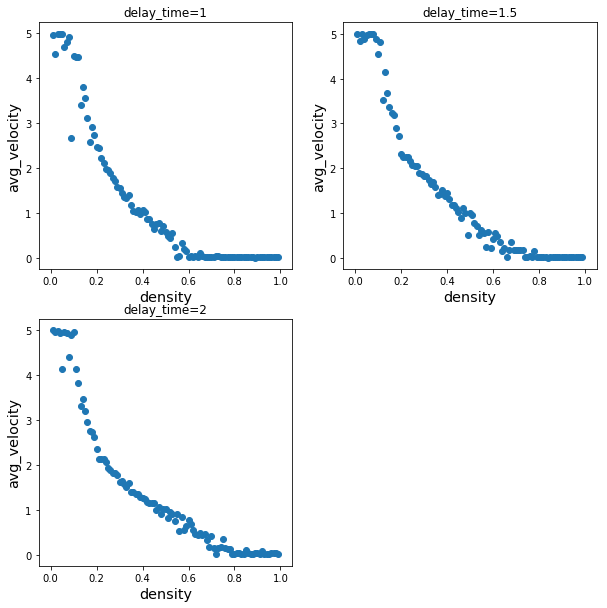

In [31]:
plt.figure(figsize=(10,10))
plt.subplot(221)
plt.title("delay_time=1")
plt.xlabel("density",fontsize='x-large')
plt.ylabel("avg_velocity",fontsize='x-large')
plt.scatter(rho,v1)
plt.subplot(222)
plt.title("delay_time=1.5")
plt.xlabel("density",fontsize='x-large')
plt.ylabel("avg_velocity",fontsize='x-large')
plt.scatter(rho,v2)
plt.subplot(223)
plt.title("delay_time=2")
plt.xlabel("density",fontsize='x-large')
plt.ylabel("avg_velocity",fontsize='x-large')
plt.scatter(rho,v3)

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
4

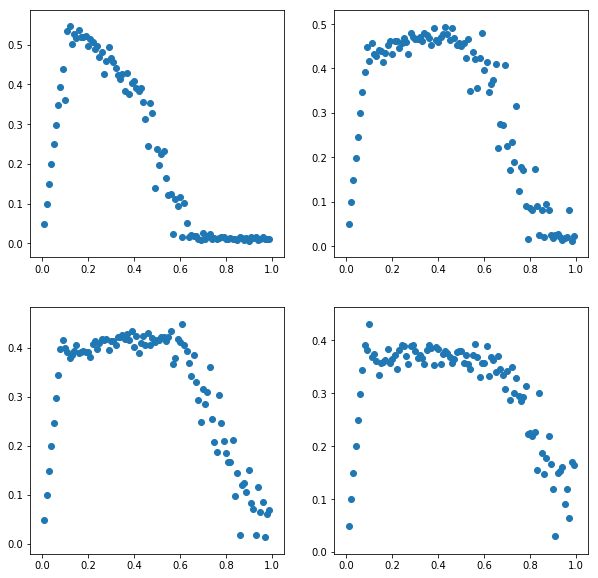

In [3]:
rho=[]
v1=[]
v2=[]
v3=[]
v4=[]
q1=[]
for i in range(1,100,1):
    avgV=[] 
    P=[]
    t=[]
    print(i)
    traffic(5,5,5,i/100)
    v=[avgV[j] for j in range(T-101,T,10)] #取平衡之後的平均速度
    v1.append(avg(v))
    q1.append(avg(v)*i/100)
    rho.append(i/100)

q2=[]
for i in range(1,100,1):
    avgV=[] 
    P=[]
    t=[]
    print(i)
    traffic(5,5,2.10,i/100)
    v=[avgV[j] for j in range(T-101,T,10)] #取平衡之後的平均速度
    v2.append(avg(v))
    q2.append(avg(v)*i/100)
    

q3=[]
for i in range(1,100,1):
    avgV=[] 
    P=[]
    t=[]
    print(i)
    traffic(5,5,3.5,i/100)
    v=[avgV[j] for j in range(T-101,T,10)] #取平衡之後的平均速度
    v3.append(avg(v))
    q3.append(avg(v)*i/100)
q4=[]
for i in range(1,100,1):
    avgV=[] 
    P=[]
    t=[]
    print(i)
    traffic(5,5,5,i/100)
    v=[avgV[j] for j in range(T-101,T,10)] #取平衡之後的平均速度
    v4.append(avg(v))
    q4.append(avg(v)*i/100)


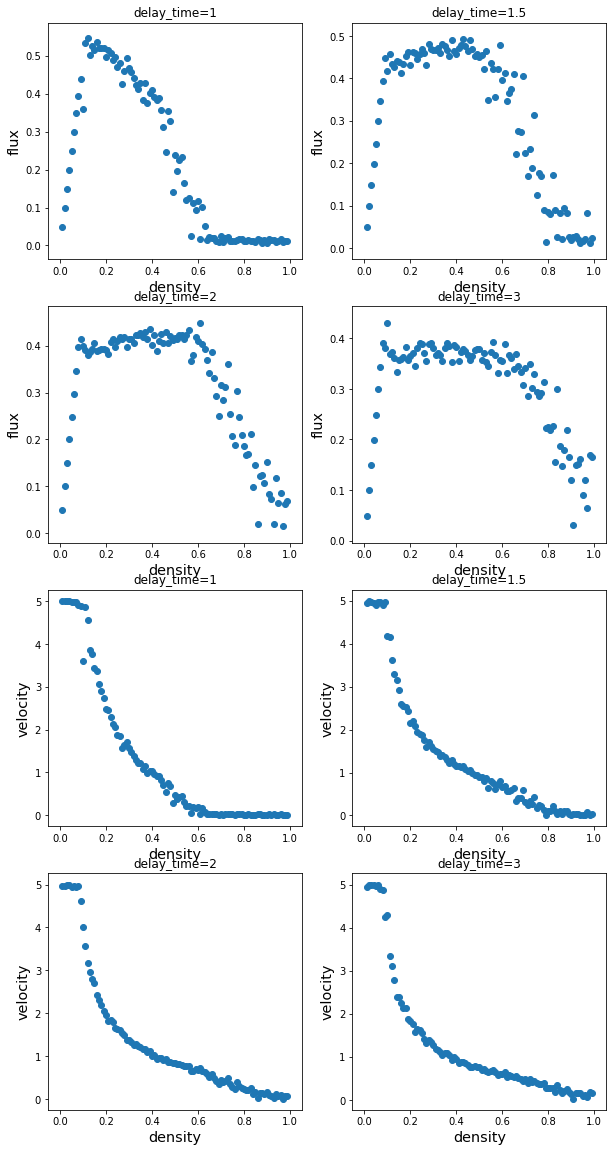

In [10]:
plt.figure(figsize=(10,20))
plt.subplot(421)
plt.title("delay_time=1")
plt.xlabel("density",fontsize='x-large')
plt.ylabel("flux",fontsize='x-large')
plt.scatter(rho,q1)
plt.subplot(422)
plt.title("delay_time=1.5")
plt.xlabel("density",fontsize='x-large')
plt.ylabel("flux",fontsize='x-large')
plt.scatter(rho,q2)
plt.subplot(423)
plt.title("delay_time=2")
plt.xlabel("density",fontsize='x-large')
plt.ylabel("flux",fontsize='x-large')
plt.scatter(rho,q3)
plt.subplot(424)
plt.title("delay_time=3")
plt.xlabel("density",fontsize='x-large')
plt.ylabel("flux",fontsize='x-large')
plt.scatter(rho,q4)

plt.subplot(425)
plt.title("delay_time=1")
plt.xlabel("density",fontsize='x-large')
plt.ylabel("velocity",fontsize='x-large')
plt.scatter(rho,v1)
plt.subplot(426)
plt.title("delay_time=1.5")
plt.xlabel("density",fontsize='x-large')
plt.ylabel("velocity",fontsize='x-large')
plt.scatter(rho,v2)
plt.subplot(427)
plt.title("delay_time=2")
plt.xlabel("density",fontsize='x-large')
plt.ylabel("velocity",fontsize='x-large')
plt.scatter(rho,v3)
plt.subplot(428)
plt.title("delay_time=3")
plt.xlabel("density",fontsize='x-large')
plt.ylabel("velocity",fontsize='x-large')
plt.scatter(rho,v4)

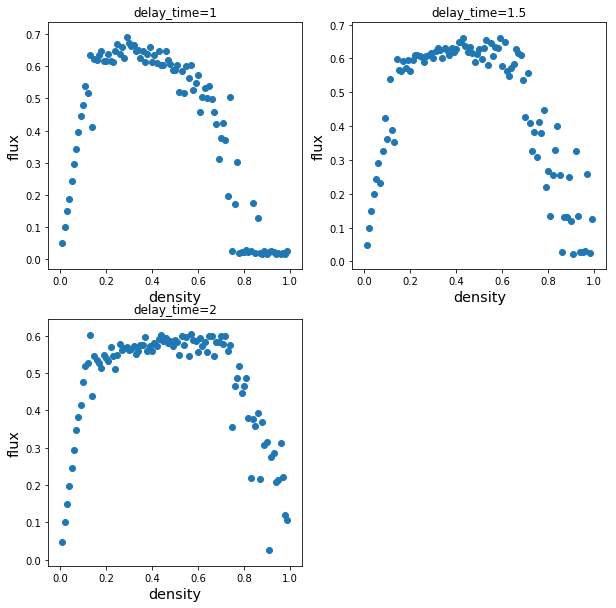

In [33]:
#avg Safe distince is 4
plt.figure(figsize=(10,10))
plt.subplot(221)
plt.title("delay_time=1")
plt.xlabel("density",fontsize='x-large')
plt.ylabel("flux",fontsize='x-large')
plt.scatter(rho,q1)
plt.subplot(222)
plt.title("delay_time=1.5")
plt.xlabel("density",fontsize='x-large')
plt.ylabel("flux",fontsize='x-large')
plt.scatter(rho,q2)
plt.subplot(223)
plt.title("delay_time=2")
plt.xlabel("density",fontsize='x-large')
plt.ylabel("flux",fontsize='x-large')
plt.scatter(rho,q3)

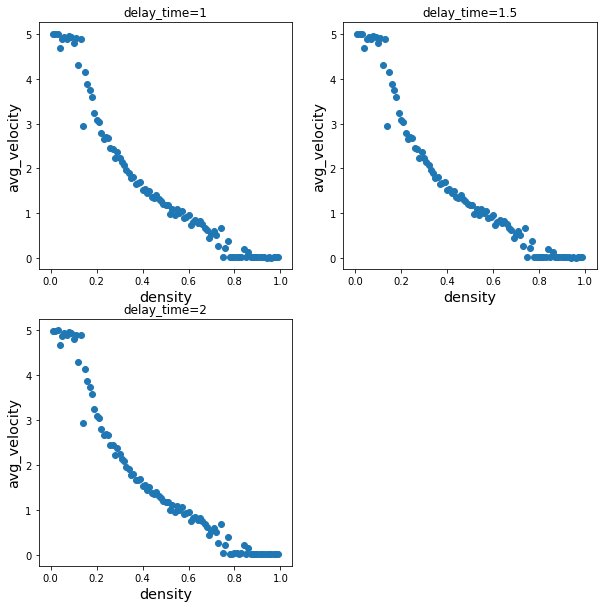

In [36]:
plt.figure(figsize=(10,10))
plt.subplot(221)
plt.title("delay_time=1")
plt.xlabel("density",fontsize='x-large')
plt.ylabel("avg_velocity",fontsize='x-large')
plt.scatter(rho,v1)
plt.subplot(222)
plt.title("delay_time=1.5")
plt.xlabel("density",fontsize='x-large')
plt.ylabel("avg_velocity",fontsize='x-large')
plt.scatter(rho,v2)
plt.subplot(223)
plt.title("delay_time=2")
plt.xlabel("density",fontsize='x-large')
plt.ylabel("avg_velocity",fontsize='x-large')
plt.scatter(rho,v3)

In [35]:
rho=[]
v1=[]
v2=[]
v3=[]
v4=[]
q1=[]
for i in range(1,100,1):
    avgV=[] 
    P=[]
    t=[]
    print(i)
    traffic(5,6,1,i/100)
    v=[avgV[j] for j in range(T-101,T,10)] #取平衡之後的平均速度
    v1.append(avg(v))
    q1.append(avg(v)*i/100)
    rho.append(i/100)

q2=[]
for i in range(1,100,1):
    avgV=[] 
    P=[]
    t=[]
    print(i)
    traffic(5,6,1.5,i/100)
    v=[avgV[j] for j in range(T-101,T,10)] #取平衡之後的平均速度
    v2.append(avg(v))
    q2.append(avg(v)*i/100)
    

q3=[]
for i in range(1,100,1):
    avgV=[] 
    P=[]
    t=[]
    print(i)
    traffic(5,6,2,i/100)
    v=[avgV[j] for j in range(T-101,T,10)] #取平衡之後的平均速度
    v3.append(avg(v))
    q3.append(avg(v)*i/100)
q4=[]
for i in range(1,100,1):
    avgV=[] 
    P=[]
    t=[]
    print(i)
    traffic(5,6,3,i/100)
    v=[avgV[j] for j in range(T-101,T,10)] #取平衡之後的平均速度
    v4.append(avg(v))
    q4.append(avg(v)*i/100)
plt.figure(figsize=(10,10))
plt.subplot(221)
plt.scatter(rho,q1)
plt.subplot(222)
plt.scatter(rho,q2)
plt.subplot(223)
plt.scatter(rho,q3)
plt.subplot(224)
plt.scatter(rho,q4)

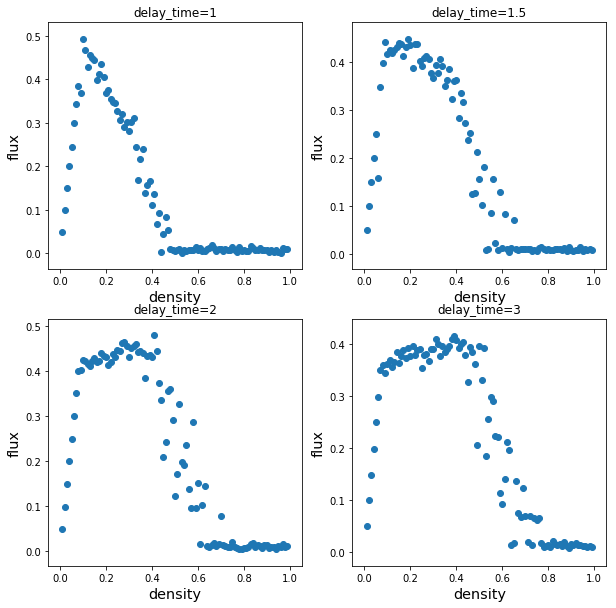

In [38]:
#avg Safe distince is 6
plt.figure(figsize=(10,10))
plt.subplot(221)
plt.title("delay_time=1")
plt.xlabel("density",fontsize='x-large')
plt.ylabel("flux",fontsize='x-large')
plt.scatter(rho,q1)
plt.subplot(222)
plt.title("delay_time=1.5")
plt.xlabel("density",fontsize='x-large')
plt.ylabel("flux",fontsize='x-large')
plt.scatter(rho,q2)
plt.subplot(223)
plt.title("delay_time=2")
plt.xlabel("density",fontsize='x-large')
plt.ylabel("flux",fontsize='x-large')
plt.scatter(rho,q3)
plt.subplot(224)
plt.title("delay_time=3")
plt.xlabel("density",fontsize='x-large')
plt.ylabel("flux",fontsize='x-large')
plt.scatter(rho,q4)

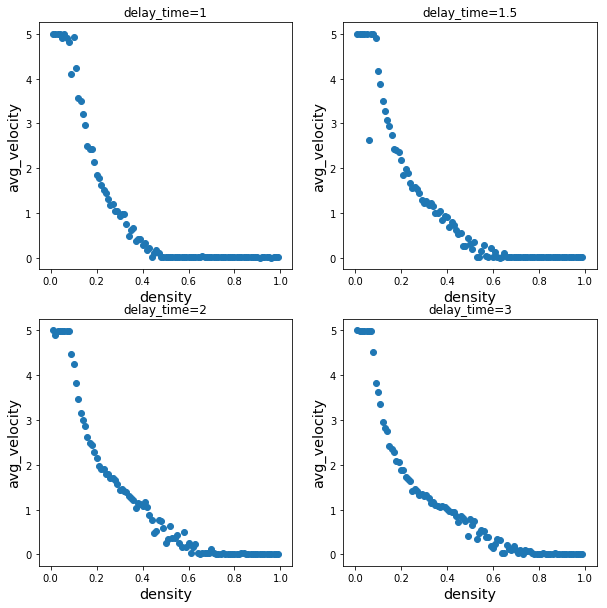

In [39]:
plt.figure(figsize=(10,10))
plt.subplot(221)
plt.title("delay_time=1")
plt.xlabel("density",fontsize='x-large')
plt.ylabel("avg_velocity",fontsize='x-large')
plt.scatter(rho,v1)
plt.subplot(222)
plt.title("delay_time=1.5")
plt.xlabel("density",fontsize='x-large')
plt.ylabel("avg_velocity",fontsize='x-large')
plt.scatter(rho,v2)
plt.subplot(223)
plt.title("delay_time=2")
plt.xlabel("density",fontsize='x-large')
plt.ylabel("avg_velocity",fontsize='x-large')
plt.scatter(rho,v3)
plt.subplot(224)
plt.title("delay_time=3")
plt.xlabel("density",fontsize='x-large')
plt.ylabel("avg_velocity",fontsize='x-large')
plt.scatter(rho,v4)

In [40]:
q5=[]
v5=[]
q6=[]
v6=[]
for i in range(1,100,1):
    avgV=[] 
    P=[]
    t=[]
    print(i)
    traffic(5,6,10,i/100)
    v=[avgV[j] for j in range(T-101,T,10)] #取平衡之後的平均速度
    v5.append(avg(v))
    q5.append(avg(v)*i/100)
    
for i in range(1,100,1):
    avgV=[] 
    P=[]
    t=[]
    print(i)
    traffic(5,6,30,i/100)
    v=[avgV[j] for j in range(T-101,T,10)] #取平衡之後的平均速度
    v6.append(avg(v))
    q6.append(avg(v)*i/100)


1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99


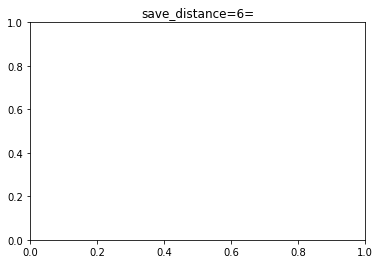

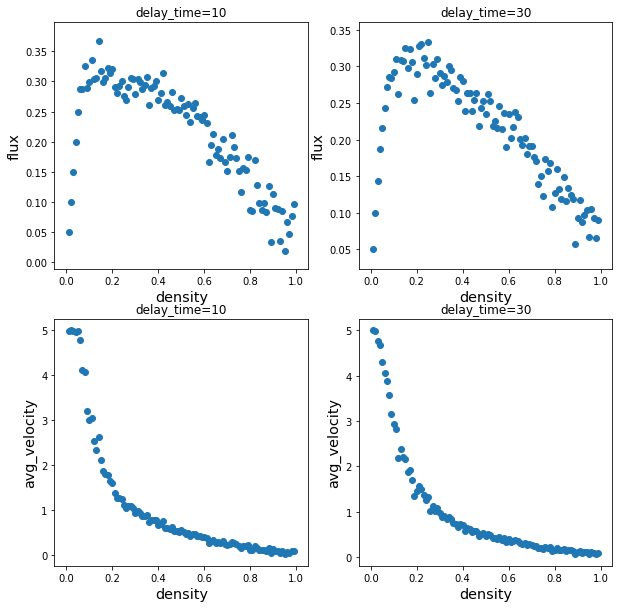

In [46]:
plt.title("save_distance=6=")
plt.figure(figsize=(10,10))
plt.subplot(221)
plt.title("delay_time=10")
plt.xlabel("density",fontsize='x-large')
plt.ylabel("flux",fontsize='x-large')
plt.scatter(rho,q5)
plt.subplot(222)
plt.title("delay_time=30")
plt.xlabel("density",fontsize='x-large')
plt.ylabel("flux",fontsize='x-large')
plt.scatter(rho,q6)
plt.subplot(223)
plt.title("delay_time=10")
plt.xlabel("density",fontsize='x-large')
plt.ylabel("avg_velocity",fontsize='x-large')
plt.scatter(rho,v5)
plt.subplot(224)
plt.title("delay_time=30")
plt.xlabel("density",fontsize='x-large')
plt.ylabel("avg_velocity",fontsize='x-large')
plt.scatter(rho,v6)

In [3]:
#safe distance=10
rho=[]
v1=[]
v2=[]
q1=[]
for i in range(1,100,1):
    avgV=[] 
    P=[]
    t=[]
    print(i)
    traffic(5,10,1,i/100)
    v=[avgV[j] for j in range(T-101,T,10)] #取平衡之後的平均速度
    v1.append(avg(v))
    q1.append(avg(v)*i/100)
    rho.append(i/100)

q2=[]
for i in range(1,100,1):
    avgV=[] 
    P=[]
    t=[]
    print(i)
    traffic(5,10,3.5,i/100)
    v=[avgV[j] for j in range(T-101,T,10)] #取平衡之後的平均速度
    v2.append(avg(v))
    q2.append(avg(v)*i/100)

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99


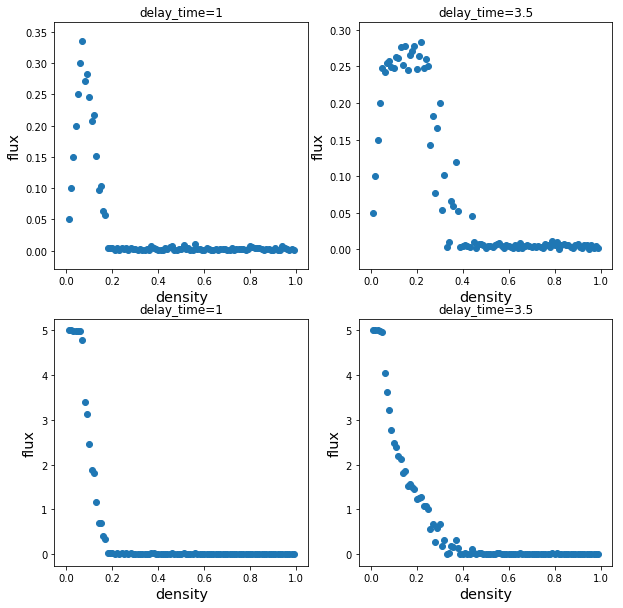

In [5]:
plt.figure(figsize=(10,10))
plt.subplot(221)
plt.title("delay_time=1")
plt.xlabel("density",fontsize='x-large')
plt.ylabel("flux",fontsize='x-large')
plt.scatter(rho,q1)
plt.subplot(222)
plt.title("delay_time=3.5")
plt.xlabel("density",fontsize='x-large')
plt.ylabel("flux",fontsize='x-large')
plt.scatter(rho,q2)
plt.subplot(223)
plt.title("delay_time=1")
plt.xlabel("density",fontsize='x-large')
plt.ylabel("flux",fontsize='x-large')
plt.scatter(rho,v1)
plt.subplot(224)
plt.title("delay_time=3.5")
plt.xlabel("density",fontsize='x-large')
plt.ylabel("flux",fontsize='x-large')
plt.scatter(rho,v2)

In [3]:

rho=[]
v1=[]

q1=[]
for i in range(1,11,1):
    avgV=[] 
    P=[]
    t=[]
    print(i)
    traffic(5,5,2,i/10)
    v=[avgV[j] for j in range(T-101,T,10)] #取平衡之後的平均速度
    v1.append(avg(v))
    q1.append(avg(v)*i/10)
    rho.append(i/10)


1
2
3
4
5
6
7
8
9
10


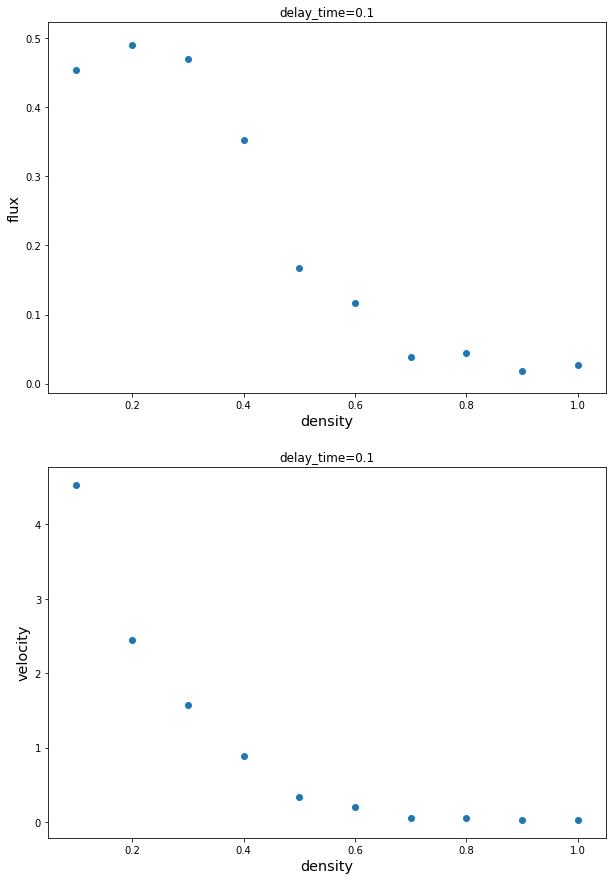

In [4]:
plt.figure(figsize=(10,15))
plt.subplot(211)
plt.title("delay_time=0.1")
plt.xlabel("density",fontsize='x-large')
plt.ylabel("flux",fontsize='x-large')
plt.scatter(rho,q1)
plt.subplot(212)
plt.title("delay_time=0.1")
plt.xlabel("density",fontsize='x-large')
plt.ylabel("velocity",fontsize='x-large')
plt.scatter(rho,v1)